In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [32]:
# Vamos a cargar la "API"

#Esto remplaza a una API de verdad, ¡Hay que revisar bien sus datos!
def API_Simulada(nombreDeArchivo):
    df = pd.read_csv(nombreDeArchivo)

    # queremos convertir la columnas key en columnas dummie
    one_hot = pd.get_dummies(df["key"], prefix="Key", drop_first = True)
    one_hot

    two_hot = pd.get_dummies(df["time_signature"], prefix="time_signature", drop_first=True)
    two_hot

    df_limpio = df.join(one_hot).drop(columns=["key"])
    df_limpio = df_limpio.join(two_hot).drop(columns=["time_signature"])
    
    #Ajustamos los datos de la API
    scaler = StandardScaler()
    columnas = df_limpio.columns.to_list()
    columnas.remove('liked') #Esto solo lo vamos a utilizar en nuestro dataset ya que tiene una columna de mas
    df_limpio[columnas] = scaler.fit_transform(df_limpio[columnas])
       
    return df_limpio
    
def crearDataFrameUsu(API):
    N = 5
    datos = API.sample(N, replace = False)
    if datos["liked"].nunique() != 2:
        datos = crearDataFrameUsu(API)  # Por posibles errores
    return datos

def entrenarDatos(modelo, datosUsuario):
    X_train =  datosUsuario.drop(["liked"], axis=1)
    y_train = datosUsuario["liked"]
    # Preparamos el modelo
    modelo.fit(X_train, y_train)
    return modelo

def busquedaCancion(API, modelo):
    infoCancion = API.sample(1)
    predictCancion = infoCancion.drop(["liked"], axis=1)
    prediccion = modelo.predict(predictCancion)[0]  #Devuelve 0 o 1 si le gusto en una lista
    
    return prediccion, infoCancion
    #Aca le mostramos la cancion con la API Spotify


def agregarCanciones(N, datosUsuario, API, modelo, accuracy):
    modelo = entrenarDatos(modelo, datosUsuario)  #Entrenamos el modelo cuantas veces

    filas = datosUsuario.shape[0]
    while datosUsuario.shape[0] < filas + N:
        prediccion, infoCancion = busquedaCancion(API, modelo)
        if not infoCancion.index[0] in datosUsuario.index:
            if prediccion == 1:
                datosUsuario = datosUsuario.append(infoCancion, ignore_index = False)
                accuracy.append(accuracyMetrica(datosUsuario, modelo))
                
            
    return datosUsuario


def metricaLiked(datosUsuario):
    n = datosUsuario.shape[0]
    x = list(range(1, n + 1))
    y = datosUsuario["liked"]
    y = np.cumsum(y)

    # Plot the responses for different events and regions
    sns.lineplot(x = x,y = y)
    sns.lineplot(x = x,y = x)


def accuracyMetrica(datosUsuario, modelo):
    if (datosUsuario["liked"] == 0).sum() < 2: return
    if (datosUsuario["liked"] == 1).sum() < 2: return
    X_train, X_test, y_train, y_test = train_test_split(datosUsuario.drop(["liked"], axis=1), datosUsuario["liked"], test_size = 0.5, stratify=datosUsuario["liked"])
    modelo.fit(X_train, y_train)
    # Buscamos la predicciones y su probabilidad
    y_pred = modelo.predict(X_test)
    n = datosUsuario.shape[0]
    ac = accuracy_score(y_test, y_pred)
    nula = datosUsuario["liked"].sum() / datosUsuario.shape[0]
    return ac, nula, n

def printAccuracy(ac):
    accuracy  = []
    hipotesisNula = []
    n = []
    for a in ac:
        if not a is None:
            accuracy.append(a[0])
            hipotesisNula.append(a[1])
            n.append(a[2])
    sns.lineplot(x = n, y = accuracy)
    sns.lineplot(x = n, y = hipotesisNula)
    


[None, (1.0, 0.5, 4), (0.3333333333333333, 0.4, 5), (0.3333333333333333, 0.3333333333333333, 6), (0.25, 0.42857142857142855, 7), (0.5, 0.375, 8), (0.4, 0.4444444444444444, 9), (0.6, 0.4, 10), (0.5, 0.45454545454545453, 11), (0.8333333333333334, 0.5, 12), (0.5714285714285714, 0.5384615384615384, 13), (1.0, 0.5714285714285714, 14), (0.625, 0.6, 15), (0.875, 0.625, 16), (0.7777777777777778, 0.6470588235294118, 17), (0.8888888888888888, 0.6666666666666666, 18), (0.7, 0.6842105263157895, 19), (0.9, 0.7, 20), (0.6363636363636364, 0.6666666666666666, 21), (0.8181818181818182, 0.6818181818181818, 22), (0.75, 0.6956521739130435, 23), (0.8333333333333334, 0.7083333333333334, 24), (0.8461538461538461, 0.72, 25), (0.6923076923076923, 0.6923076923076923, 26), (0.7857142857142857, 0.6666666666666666, 27), (0.8571428571428571, 0.6428571428571429, 28), (0.8, 0.6551724137931034, 29), (0.6666666666666666, 0.6666666666666666, 30), (0.75, 0.6451612903225806, 31), (0.75, 0.65625, 32), (0.7058823529411765, 

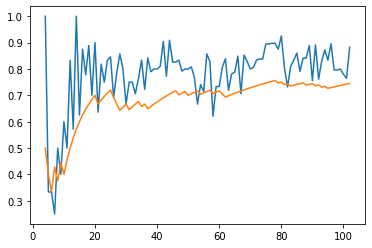

In [35]:
API = API_Simulada("data.csv")

datosUsuario = crearDataFrameUsu(API) 

# Vamos a ejecutar el modelo
clf = LogisticRegression(C=1e10)
clf = entrenarDatos(clf, datosUsuario)

accuracy = []
datosUsuario = agregarCanciones(100, datosUsuario, API, clf, accuracy)  # No mas de 100 canciones
print(accuracy)
printAccuracy(accuracy)

In [ ]:
#   Metricas!!!




accuracyMetrica(datosUsuario, clf)

#metricaLiked(datosUsuario)


(1.0, 0.7333333333333333, 15)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked,Key_1,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,time_signature_3,time_signature_4,time_signature_5
154,0.237638,-0.267633,0.380225,-1.080123,-0.928004,0.227864,-0.556448,-0.269203,-0.504224,-0.429989,0.541415,0,-0.426401,-0.288675,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,3.235829,-0.232495,-0.309040,0.383482,-0.178174
33,-0.294627,-0.221377,0.070007,-1.080123,1.582310,1.356137,-0.556951,-0.174597,-0.534186,-1.591426,-0.612251,1,-0.426401,-0.288675,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,3.235829,-0.232495,-0.309040,0.383482,-0.178174
58,-1.261960,-2.430121,-3.627406,0.925820,-0.911352,2.059354,2.031820,-0.373268,-1.596327,-0.708970,0.037296,0,-0.426401,-0.288675,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,2.804218,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174
55,-0.317769,0.576532,0.280814,0.925820,-0.665732,-0.400343,-0.556445,-0.672221,-0.620326,0.673723,0.078759,1,-0.426401,3.464102,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174
164,1.167945,0.029174,0.478714,0.925820,-0.684050,-0.387842,-0.556863,-0.929547,1.769118,-0.365697,0.000251,0,-0.426401,-0.288675,-0.162221,-0.219971,-0.318896,-0.338062,3.043544,-0.356606,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174
23,-0.169660,-0.398690,-0.391248,0.925820,1.890375,-0.140934,-0.556955,-0.473550,-1.080986,2.104395,-0.519806,1,-0.426401,-0.288675,-0.162221,4.546061,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,-0.309040,-0.232495,3.235829,-2.607681,-0.178174
60,-0.178917,0.133249,-0.145870,0.925820,-0.663234,-0.865404,-0.556757,1.329625,0.360919,-0.680090,-0.218376,0,-0.426401,3.464102,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174
139,0.880984,0.248888,0.746525,0.925820,-0.307711,-0.804459,-0.556955,-0.946576,0.345938,0.569628,0.014549,1,-0.426401,3.464102,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174
70,0.635680,0.827083,0.391595,0.925820,0.807984,-0.911348,-0.556955,-0.575723,0.469530,0.069783,-1.492472,1,2.345208,-0.288675,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174
6,0.135814,-0.190540,0.165423,-1.080123,1.457419,0.737306,-0.556955,-0.325966,1.057528,-1.646115,-0.935926,1,-0.426401,-0.288675,-0.162221,-0.219971,-0.318896,-0.338062,-0.328564,-0.356606,-0.318896,-0.309040,-0.232495,-0.309040,0.383482,-0.178174


Una funcion nueva que use lo que tenemos, buscar una muestras y predecirlo (No entrenarlo)